# Импорт библиотек

In [2]:
import pandas as pd
import numpy as np

import kaggle

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import chisquare

# Информация о наборе данных

Как известно, привлечение нового клиента обходится гораздо дороже, чем удержание существующего.

Банкам важно знать, что подталкивает клиента к решению покинуть компанию.

Профилактика оттока позволяет компаниям разрабатывать программы лояльности и кампании по удержанию клиентов, чтобы сохранить как можно больше клиентов.

## Описание Переменных

RowNumber — соответствует номеру записи (строки).

CustomerId — id клиента.

Surname — фамилия клиента.

CreditScore — кредитный рейтинг.

Geography — местоположение клиента.

Gender — пол клиента.

Age — возраст клиента.

Tenure — количество лет, в течение которых клиент является клиентом банка.

Balance — баланс на счетах клиента.

NumOfProducts — количество продуктов, купленных клиентом через банк.

HasCrCard — наличие кредитной карты у клиента.

IsActiveMember — Активные клиенты.

EstimatedSalary — зарплата клиента.

Exited — переменная флаг, означает покинул ли клиент банк. Наш таргет.

Complain — есть ли у клиента жалоба.

Satisfaction Score — оценка клиента по результатам разрешения жалобы.

Card Type — тип карты, которой владеет клиент.

Points Earned — баллы, начисленные клиенту за использование кредитной карты.

# Задача

Исследуя набор данных, выявить закономерности и факторы, которые влияют на отток клиентов банка.

# Загрузка датасета

In [10]:
kaggle.api.dataset_download_files(dataset = "radheshyamkollipara/bank-customer-churn", 
                                  path='data/', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn


In [11]:
df = pd.read_csv('data/Customer-Churn-Records.csv', encoding='ISO-8859-1')
df = df.drop(columns='RowNumber')
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


# Структура и характеристики датасета

## Проверка корректности датасета

Оценка клиента по результатам разрешения жалобы (столбец 'Satisfaction Score') может быть заполнена лишь в том случае, если есть жалоба, т.е. Complain = 1. Исправим это.

In [15]:
def complain(dataframe):
    if dataframe['Complain'] == 0:
        dataframe['Satisfaction Score'] = np.nan
    if dataframe['Complain'] == 1:
        dataframe['Satisfaction Score'] = dataframe['Satisfaction Score']
    return dataframe['Satisfaction Score']

In [16]:
df['Satisfaction Score'] = df.apply(complain, axis = 1)

In [17]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2.0,DIAMOND,464
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3.0,DIAMOND,456
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3.0,DIAMOND,377
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,NaN,GOLD,350
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,NaN,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,NaN,DIAMOND,300
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,NaN,PLATINUM,771
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3.0,SILVER,564
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2.0,GOLD,339


## Размер датасета

In [19]:
df.shape

(10000, 17)

In [20]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score',
       'Card Type', 'Point Earned'],
      dtype='object')

In [21]:
df.columns = ['Customer_Id', 'Surname', 'Credit_Score', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num_Of_Products', 'Has_CrCard', 'Is_Active_Member',
       'Estimated_Salary', 'Exited', 'Complain', 'Satisfaction_Score',
       'Card_Type', 'Point_Earned']

## Краткое описание датасета

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_Id         10000 non-null  int64  
 1   Surname             10000 non-null  object 
 2   Credit_Score        10000 non-null  int64  
 3   Geography           10000 non-null  object 
 4   Gender              10000 non-null  object 
 5   Age                 10000 non-null  int64  
 6   Tenure              10000 non-null  int64  
 7   Balance             10000 non-null  float64
 8   Num_Of_Products     10000 non-null  int64  
 9   Has_CrCard          10000 non-null  int64  
 10  Is_Active_Member    10000 non-null  int64  
 11  Estimated_Salary    10000 non-null  float64
 12  Exited              10000 non-null  int64  
 13  Complain            10000 non-null  int64  
 14  Satisfaction_Score  2044 non-null   float64
 15  Card_Type           10000 non-null  object 
 16  Point

## Описательная статистика

In [25]:
df.describe()

,Customer_Id,Credit_Score,Age,Tenure,Balance,Num_Of_Products,Has_CrCard,Is_Active_Member,Estimated_Salary,Exited,Complain,Satisfaction_Score,Point_Earned
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,2044.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.000489,606.515100
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.399077,225.924839
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


## Типы данных

In [27]:
df.dtypes

Customer_Id             int64
Surname                object
Credit_Score            int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
Num_Of_Products         int64
Has_CrCard              int64
Is_Active_Member        int64
Estimated_Salary      float64
Exited                  int64
Complain                int64
Satisfaction_Score    float64
Card_Type              object
Point_Earned            int64
dtype: object

## Наличие пропущенных значений

In [29]:
df.isna().mean()

Customer_Id           0.0000
Surname               0.0000
Credit_Score          0.0000
Geography             0.0000
Gender                0.0000
Age                   0.0000
Tenure                0.0000
Balance               0.0000
Num_Of_Products       0.0000
Has_CrCard            0.0000
Is_Active_Member      0.0000
Estimated_Salary      0.0000
Exited                0.0000
Complain              0.0000
Satisfaction_Score    0.7956
Card_Type             0.0000
Point_Earned          0.0000
dtype: float64

Пропуски только там, где нет Satisfaction_Score, т.к. жалоба отсутствует у этих клиентов.

## Наличие дубликатов

In [32]:
(df.
 duplicated().
 value_counts()
)

False    10000
Name: count, dtype: int64

Дублирующиеся строки отсутствуют

## Распределение зависимой переменной

In [35]:
exited_df = df['Exited'].value_counts()
exited_df = exited_df.reset_index()
exited_df

,Exited,count
0,0,7962
1,1,2038


Text(0.5, 1.0, 'Распределение переменной ухода клиента, %')

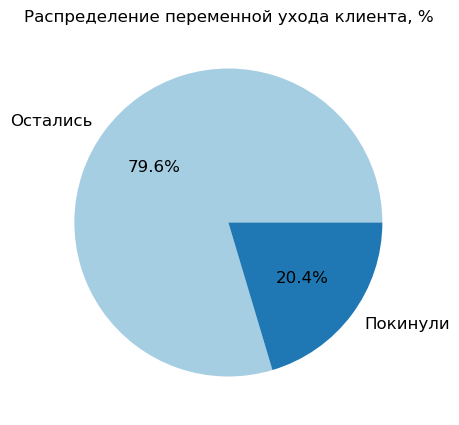

In [36]:
fig = plt.figure(figsize=(5,5))
#plt.figure(figsize=(5,5))
plt.pie(
    x=exited_df['count'], 
    labels=['Остались', 'Покинули'], 
    autopct = '%1.1f%%',
    textprops={'fontsize':12},
    colors=sns.color_palette('Paired')
)
plt.title('Распределение переменной ухода клиента, %')


# Анализ категориальных переменных

## Chi-square тест

Для выявления взаимосвязи между двумя номинативными переменными используется тест хи-квадрат (Chi-square Test). Напишем функцию, для расчета критерия хи-квадрат и p-value. 

На вход функция будет принимать список с номинативными переменными. На выходе получим датафрэйм с критерием хи-квадрат и p-value. Здесь нулевая гипотеза H0: переменные не взаимосвязаны. 

Если p_value < 0.05, отклоняем нулевую гипотезу - переменные не взаимосвязаны и принимаем альтернативную. Если p_value > 0.05, следовательно, принимаем нулевую гипотезу.

In [40]:
lst_cat = ['Geography', 'Gender', 'Complain', 'Is_Active_Member', 'Has_CrCard', 'Num_Of_Products', 'Satisfaction_Score', 'Card_Type']

In [41]:
def chi_square(lst):
    dictionary = {}
    dictionary['column'] = []
    dictionary['chi2'] = []
    dictionary['p_value'] = []
    for x in lst:
        contingency_table = pd.crosstab(df['Exited'], df[x], margins=True)
        chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
        
        dictionary['column'].append(x)
        dictionary['chi2'].append(np.round(chi2, 2))
        dictionary['p_value'].append(np.round(p_value, 2))

    chi2_df = pd.DataFrame(dictionary)
    chi2_df['flag'] = chi2_df['p_value'].apply(lambda x: 1 if x < 0.05 else 0)
    return chi2_df

In [42]:
chi_square(lst_cat)

,column,chi2,p_value,flag
0,Geography,300.63,0.00,1
1,Gender,112.93,0.00,1
2,Complain,9914.04,0.00,1
3,Is_Active_Member,244.47,0.00,1
4,Has_CrCard,0.49,0.97,0
5,Num_Of_Products,1501.50,0.00,1
6,Satisfaction_Score,8.22,0.61,0
7,Card_Type,5.05,0.75,0


Тест хи-квадрат (Chi-square Test) показал, что переменные Has_CrCard, Satisfaction_Score и Card_Type не связаны с переменной Exited.

Для дальнейшего анализа будем использовать сводные таблицы и биновый график. Для каждой группы посчитаем среднее значение (mean) целевой переменной - долю ушедших клиентов. Если есть существенные различия в группах, то существует связь между исследуемыми переменными.

## Geography

In [46]:
df.groupby('Geography')['Exited'].agg(['count', 'mean'])

,count,mean
Geography,,
France,5014,0.161747
Germany,2509,0.324432
Spain,2477,0.166734


<Axes: xlabel='Geography'>

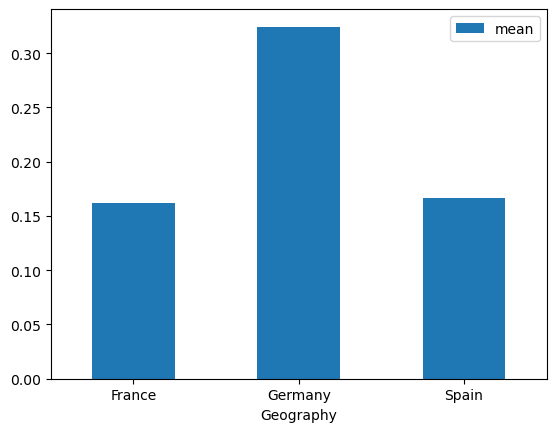

In [47]:
df.groupby('Geography')['Exited'].agg(['mean']).plot(kind = 'bar', rot=0)

Показатель оттока различается в разных странах. В Германии он составил 32.4%, во Франции - 16.2%, в Испании - 16.7%. Это значит, что страна проживания клиента может влиять на его уход из банка. Компании, в первую очередь, следует обратить внимание на клиентов из Германии.  

## Gender

In [50]:
df.groupby('Gender')['Exited'].agg(['count', 'mean'])

,count,mean
Gender,,
Female,4543,0.250715
Male,5457,0.164743


<Axes: xlabel='Gender'>

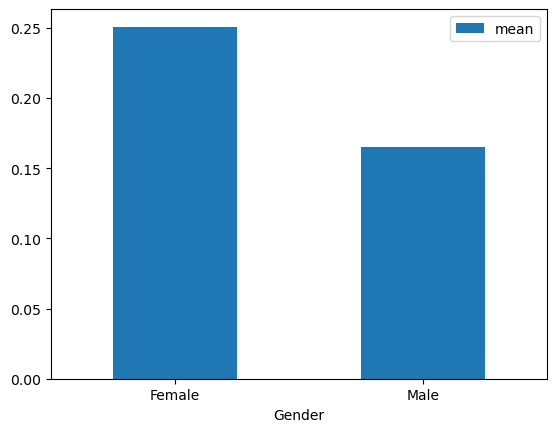

In [51]:
df.groupby('Gender')['Exited'].agg(['mean']).plot(kind = 'bar', rot=0)

Показатель оттока выше среди клиентов-женщин (25.1%) по сравнению с клиентами-мужчинами (16.5%). Это значит, что пол может играть роль в уходе клиента из банка. Клиенты женского пола более склонны к уходу.

## Complain

In [54]:
df.groupby('Complain')['Exited'].agg(['count', 'mean'])

,count,mean
Complain,,
0,7956,0.000503
1,2044,0.995108


Анализ сводной таблицы позволяет сделать вывод, что 99.5% клиентов, у которых была жалоба, ушли из банка. Т.е. если у клиента есть жалоба, то он скорее всего перестанет быть клиентом банка. При отсутствии жалоб вероятность ухода клиента очень низкая (0.05%). Компании следует обратить на это внимание. 

## IsActiveMember

In [57]:
df.groupby('Is_Active_Member')['Exited'].agg(['count', 'mean'])

,count,mean
Is_Active_Member,,
0,4849,0.268715
1,5151,0.142691


<Axes: xlabel='Is_Active_Member'>

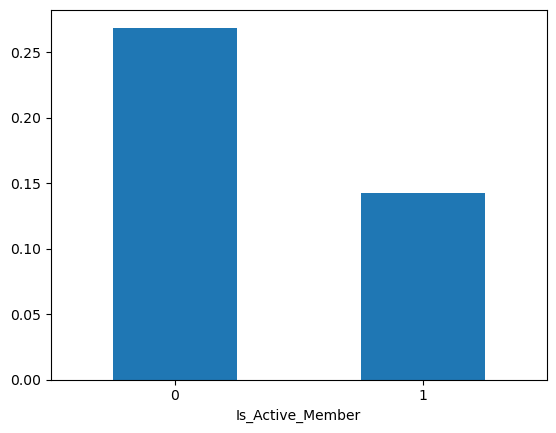

In [58]:
df.groupby('Is_Active_Member')['Exited'].agg('mean').plot(kind = 'bar', rot=0)

Статус активности клиента влияет на отток клиентов из банка. Неактивные клинты чаще покидают банк (26.8%) по сравнению с активными клиентами (14.3%).

## HasCrCard

In [61]:
df.groupby('Has_CrCard')['Exited'].agg(['count', 'mean'])

,count,mean
Has_CrCard,,
0,2945,0.208149
1,7055,0.201984


<Axes: xlabel='Has_CrCard'>

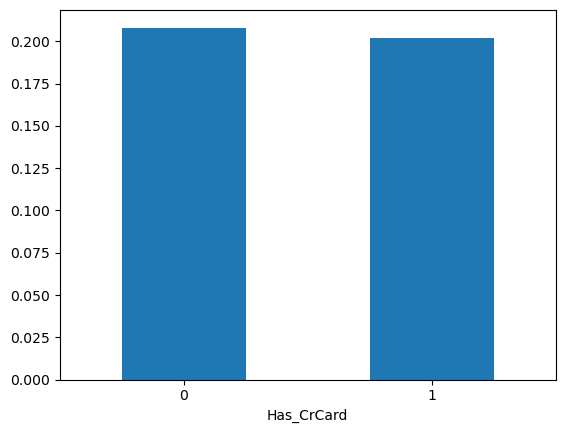

In [62]:
df.groupby('Has_CrCard')['Exited'].agg('mean').plot(kind = 'bar', rot=0)

Наличие кредитной карты не влияет на отток клиентов из банка, т.к. показатель примерно одинаков для обеих групп (имеющих и неимеющих кредитную карту)

## NumOfProducts

In [65]:
df.groupby('Num_Of_Products')['Exited'].agg(['count', 'mean'])

,count,mean
Num_Of_Products,,
1,5084,0.277144
2,4590,0.076035
3,266,0.827068
4,60,1.000000


<Axes: xlabel='Num_Of_Products'>

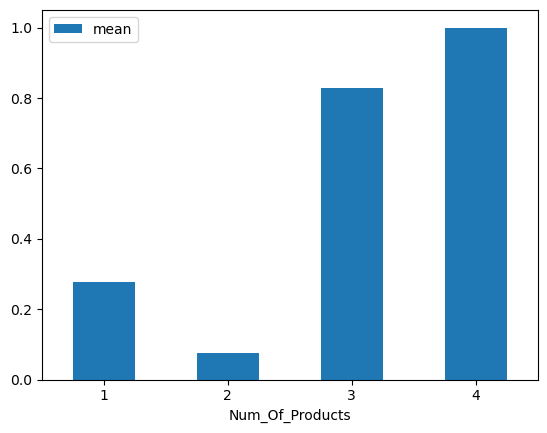

In [66]:
df.groupby('Num_Of_Products')['Exited'].agg(['mean']).plot(kind='bar', rot=0)

Количество продуктов, купленных клиентом через банк влияет на отток клиентов из банка. Здесь мы не можем сказать, что 3 и 4 купленных продукта сильно влияют на уход клиента, т.к. по ним очень мало данных (266 и 60 клиентов соответственно). Но можем сделать вывод, что вероятность ухода у клиентов с 1 продуктом (27.7%) выше, чем у клиентов с двумя продуктами (7.6%).

## Card Type

In [69]:
df.groupby('Card_Type')['Exited'].agg(['count', 'mean'])

,count,mean
Card_Type,,
DIAMOND,2507,0.217790
GOLD,2502,0.192646
PLATINUM,2495,0.203607
SILVER,2496,0.201122


<Axes: xlabel='Card_Type'>

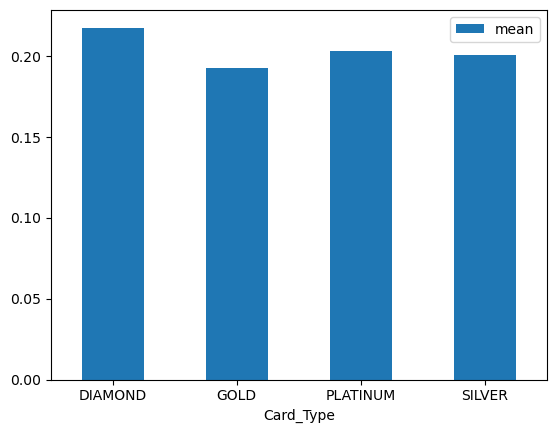

In [70]:
df.groupby('Card_Type')['Exited'].agg(['mean']).plot(kind='bar', rot=0)

Тип карты не влияет на отток клиентов банка.

## Satisfaction_Score

In [73]:
(df.
 groupby('Satisfaction_Score')['Exited'].agg(['count', 'mean'])
)

,count,mean
Satisfaction_Score,,
1.0,387,0.997416
2.0,438,0.997717
3.0,406,0.987685
4.0,413,1.000000
5.0,400,0.992500


<Axes: xlabel='Satisfaction_Score'>

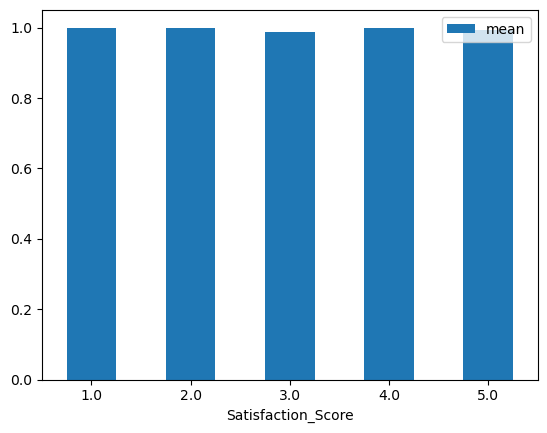

In [74]:
df.groupby('Satisfaction_Score')['Exited'].agg(['mean']).plot(kind='bar', rot=0)

Оценка клиента по результатам разрешения жалобы не влияет на отток клиентов банка.

## Общая визуализация

Text(0, 0.5, 'Mean')

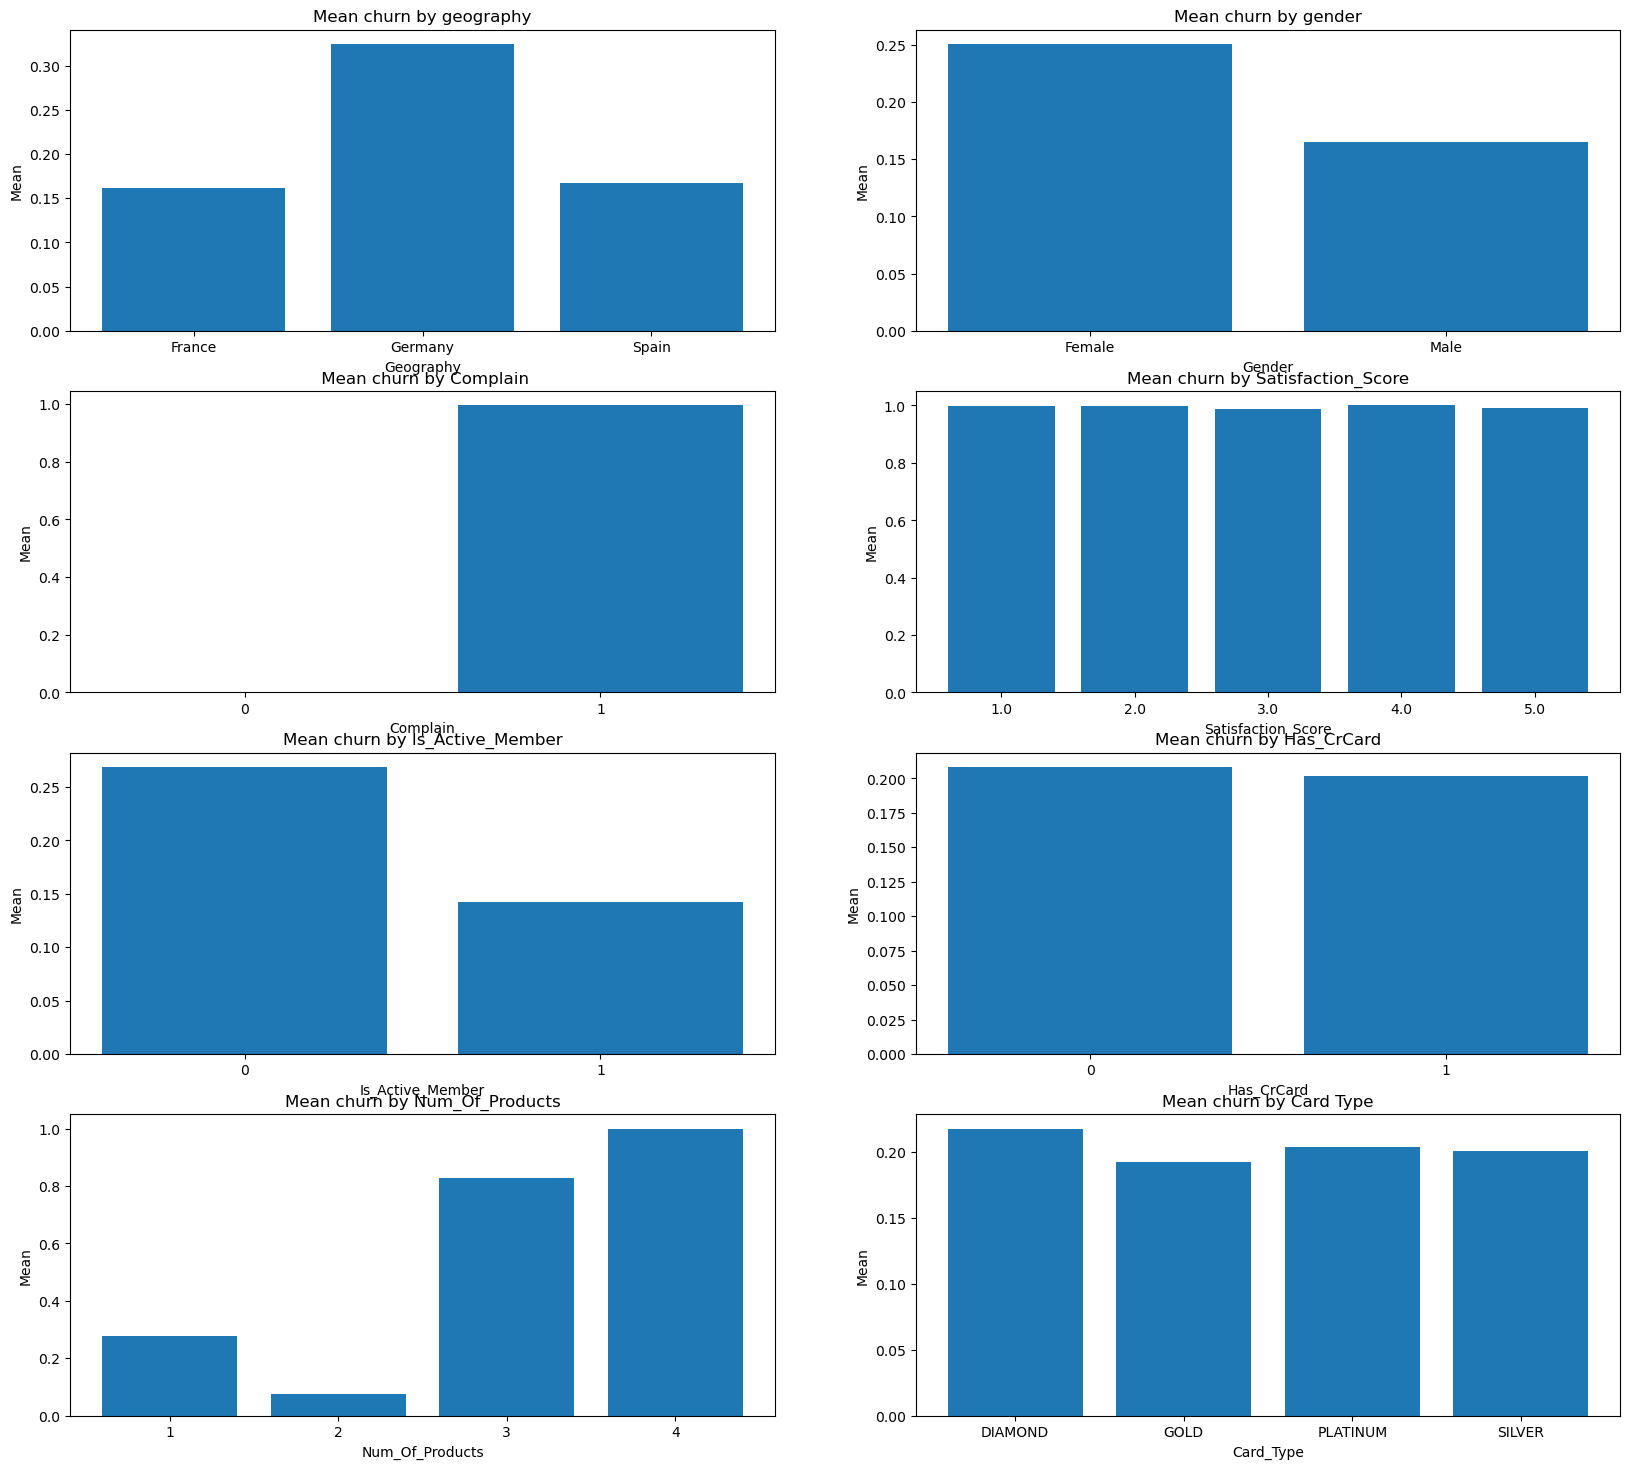

In [77]:
plt.figure(figsize = (20, 18))

plt.subplot(4, 2, 1)
Geography_mean = df.groupby('Geography')['Exited'].agg(['mean'])
plt.bar(Geography_mean.index, Geography_mean['mean'])
plt.title('Mean churn by geography')
plt.xlabel('Geography')
plt.ylabel('Mean')

plt.subplot(4, 2, 2)
Gender_mean = df.groupby('Gender')['Exited'].agg(['mean'])
plt.bar(Gender_mean.index, Gender_mean['mean'])
plt.title('Mean churn by gender')
plt.xlabel('Gender')
plt.ylabel('Mean')

plt.subplot(4, 2, 3)
Complain_mean = df.groupby('Complain')['Exited'].agg(['mean'])
plt.bar(Complain_mean.index.astype(str), Complain_mean['mean'])
plt.title('\n Mean churn by Complain')
plt.xlabel('Complain')
plt.ylabel('Mean')

plt.subplot(4, 2, 4)
Satisfaction_Score_mean = df.groupby('Satisfaction_Score')['Exited'].agg(['mean'])
plt.bar(Satisfaction_Score_mean.index.astype(str), Satisfaction_Score_mean['mean'])
plt.title('Mean churn by Satisfaction_Score')
plt.xlabel('Satisfaction_Score')
plt.ylabel('Mean')

plt.subplot(4, 2, 5)
IsActiveMember_mean = df.groupby('Is_Active_Member')['Exited'].agg(['count', 'mean'])
plt.bar(IsActiveMember_mean.index.astype(str), IsActiveMember_mean['mean'])
plt.title('Mean churn by Is_Active_Member')
plt.xlabel('Is_Active_Member')
plt.ylabel('Mean')

plt.subplot(4, 2, 6)
HasCrCard_mean = df.groupby('Has_CrCard')['Exited'].agg(['count', 'mean'])
plt.bar(HasCrCard_mean.index.astype(str), HasCrCard_mean['mean'])
plt.title('Mean churn by Has_CrCard')
plt.xlabel('Has_CrCard')
plt.ylabel('Mean')

plt.subplot(4, 2, 7)
NumOfProducts_mean = df.groupby('Num_Of_Products')['Exited'].agg(['count', 'mean'])
plt.bar(NumOfProducts_mean.index.astype(str), NumOfProducts_mean['mean'])
plt.title('Mean churn by Num_Of_Products')
plt.xlabel('Num_Of_Products')
plt.ylabel('Mean')

plt.subplot(4, 2, 8)
Card_Type_mean = df.groupby('Card_Type')['Exited'].agg(['count', 'mean'])
plt.bar(Card_Type_mean.index, Card_Type_mean['mean'])
plt.title('Mean churn by Card Type')
plt.xlabel('Card_Type')
plt.ylabel('Mean')

# Анализ количественных переменных

## Распределение количественных переменных

<Axes: xlabel='Tenure', ylabel='Count'>

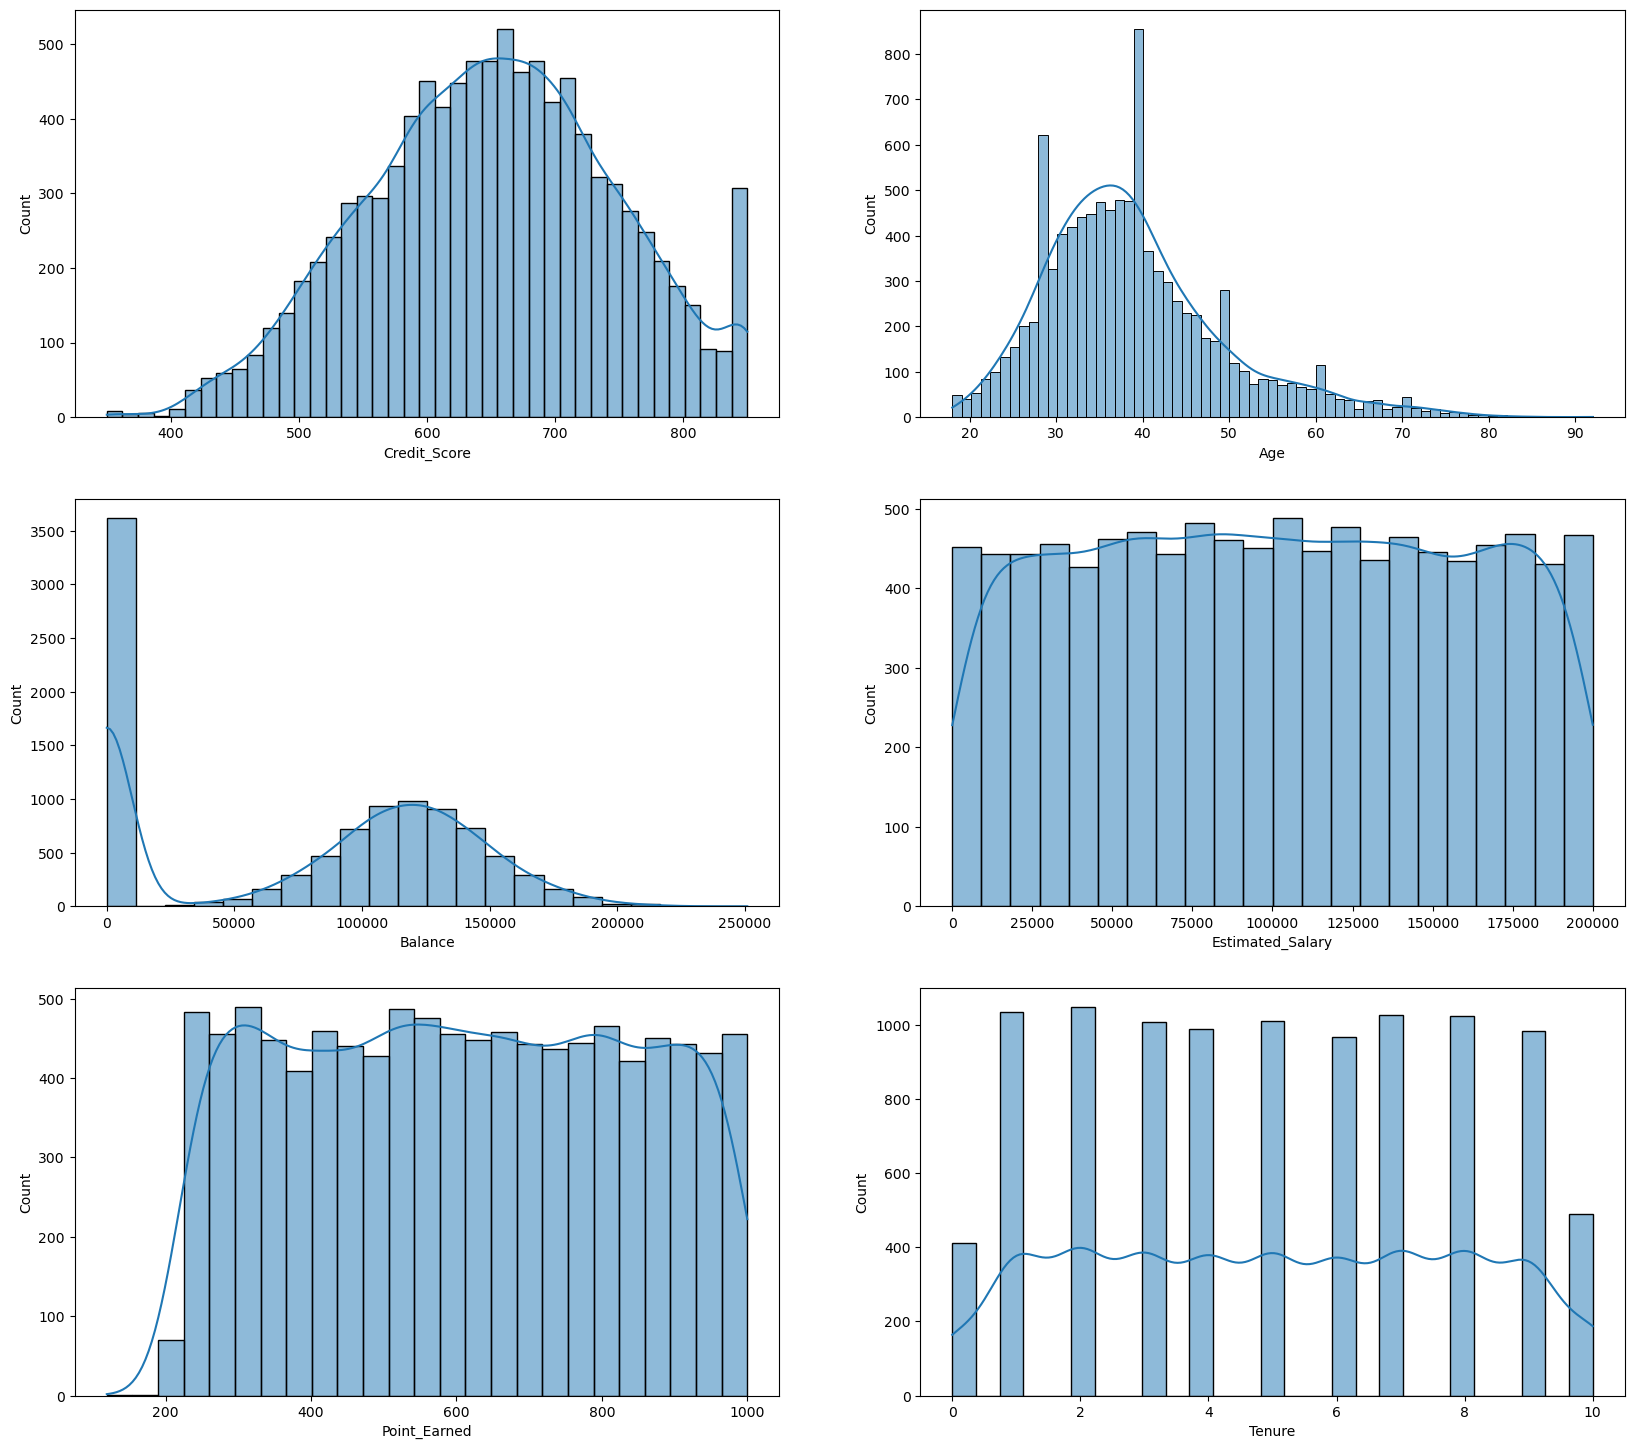

In [80]:
plt.figure(figsize = (20, 18))

plt.subplot(3, 2, 1)
sns.histplot(x = df['Credit_Score'], kde=True)

plt.subplot(3, 2, 2)
sns.histplot(x = df['Age'], kde=True)

plt.subplot(3, 2, 3)
sns.histplot(x = df['Balance'], kde=True)

plt.subplot(3, 2, 4)
sns.histplot(x = df['Estimated_Salary'], kde=True)

plt.subplot(3, 2, 5)
sns.histplot(x = df['Point_Earned'], kde=True)

plt.subplot(3, 2, 6)
sns.histplot(x = df['Tenure'], kde=True)

Переменные EstimatedSalary, Point Earned и Tenure имеют распределение, близкое к равномерному. Age и CreditScore - к нормальному. переменная Balance также имеет нормальное распределение, однако есть существенная доля тех, у кого баланс на счету равен 0. Даннную группу следует рассматривать отдельно. Таким образом, можно говорить об отсутствии серьезных выбросов и дисбаланса.

## Тест Манна-Уитни

Для выявления взаимосвязи между номинативной и количественной переменной используется t-критерий Стьюдента. Он применяется при нормальном распределении случайной величины. Т.к. у нас не идеальное нормальное распределение и есть небольшие выбросы, то лучше использовать тест Манна-Уитни(Mann_Whitney Test), который не так чувствителен к выбросам как t-тест.

Напишем функцию, для расчета U-статистики и p-value. 

На вход функция будет принимать список с количественными переменными. На выходе получим датафрэйм со значением U-статистики и p-value. Здесь нулевая гипотеза H0: распределение случайной величины в обеих группах одинаково, т.е. переменные не взаимосвязаны. 

Если p_value < 0.05, отклоняем нулевую гипотезу и принимаем альтернативную. Если p_value > 0.05 принимаем нулевую гипотезу.

In [84]:
lst_col = ['Credit_Score', 'Tenure', 'Age', 'Balance', 'Estimated_Salary', 'Point_Earned']

In [85]:
def mann_whitney(lst):
    dictionary = {}
    dictionary['column'] = []
    dictionary['U-statistic'] = []
    dictionary['p_value'] = []
    for x in lst:
        statistic, p_value = stats.mannwhitneyu(df.query('Exited == 1')[x], df.query('Exited == 0')[x])
        
        dictionary['column'].append(x)
        dictionary['U-statistic'].append(np.round(statistic, 2))
        dictionary['p_value'].append(np.round(p_value, 2))

    mann_whitney_df = pd.DataFrame(dictionary)
    mann_whitney_df['flag'] = mann_whitney_df['p_value'].apply(lambda x: 1 if x < 0.05 else 0)
    return mann_whitney_df

In [86]:
mann_whitney(lst_col)

,column,U-statistic,p_value,flag
0,Credit_Score,7846429.5,0.02,1
1,Tenure,7955556.0,0.17,0
2,Age,11878815.0,0.00,1
3,Balance,9373909.5,0.00,1
4,Estimated_Salary,8258306.0,0.21,0
5,Point_Earned,8062041.5,0.66,0


Тест Манна-Уитни показал, что переменные Tenure, Estimated_Salary и Point_Earned не связаны с переменной Exited.

`Для анализа непрерывных переменных будем использовать функцию qcut. qcut - это функция, которая делит данные на заданное число интервалов, так чтобы в каждом интервале было примерно одинаковое количество наблюдений (если это возможно).`

## CreditScore

In [90]:
df['Credit_Score_interval'] = pd.qcut(df['Credit_Score'],5)

In [91]:
df.groupby('Credit_Score_interval', observed=True)['Exited'].agg(['count', 'mean'])

,count,mean
Credit_Score_interval,,
"(349.999, 566.0]",2010,0.224876
"(566.0, 627.0]",2020,0.208416
"(627.0, 678.0]",2010,0.196517
"(678.0, 735.0]",1981,0.183241
"(735.0, 850.0]",1979,0.205659


<Axes: xlabel='Credit_Score_interval'>

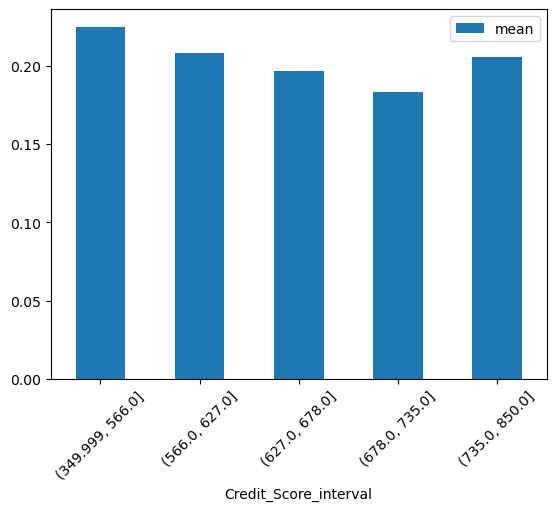

In [92]:
df.groupby('Credit_Score_interval', observed=True)['Exited'].agg(['mean']).plot(kind = 'bar', rot=45)

На первый взгляд, кредитный рейтинг не влияет на отток клиентов из банка, данный показатель примерно одинаков для всех групп. Но также здесь наблюдается нелинейная взаимосвязь - клиенты с низким и высоким рейтингом больше склонны покидать банк, чем клиенты со средним рейтингом. Для понимания влияния этой переменной требуется дополнительный анализ. 

## Age

In [95]:
df['Age_interval'] = pd.qcut(df['Age'],5)

In [96]:
df.groupby('Age_interval', observed=True)['Exited'].agg(['count', 'mean'])

,count,mean
Age_interval,,
"(17.999, 31.0]",2372,0.076307
"(31.0, 35.0]",1781,0.093206
"(35.0, 40.0]",2266,0.150044
"(40.0, 46.0]",1696,0.285967
"(46.0, 92.0]",1885,0.459416


<Axes: xlabel='Age_interval'>

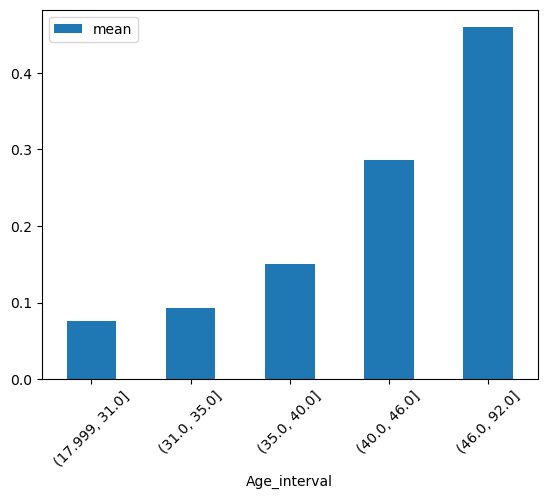

In [97]:
df.groupby('Age_interval', observed=True)['Exited'].agg(['mean']).plot(kind = 'bar', rot=45)

Возрастная группа клиента сильно влияет на показатель оттока. Из анализа видно, что с возрастом клиентов показатель оттока увеличивается. Это означает, что клиенты старшего возраста более склонны к уходу, в то время как молодые клиенты с большей вероятностью останутся в банке.

## Tenure 

In [100]:
df.groupby('Tenure', observed=True)['Exited'].agg(['count', 'mean'])

,count,mean
Tenure,,
0,413,0.230024
1,1035,0.224155
2,1048,0.191794
3,1009,0.211100
4,989,0.205258
5,1012,0.206522
6,967,0.202689
7,1028,0.172179
8,1025,0.192195


<Axes: xlabel='Tenure'>

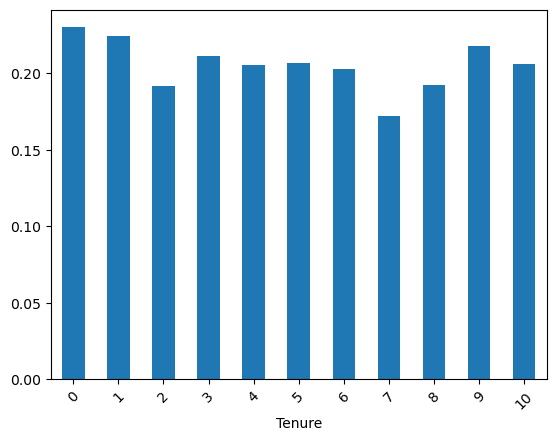

In [101]:
df.groupby('Tenure', observed=True)['Exited'].agg(['mean']).plot(kind = 'bar', rot=45, legend=False)

Количество лет, в течение которых клиент является клиентом банка, не влияет на отток клиентов банка.

## Balance

Помним, что клиентов с нулевым балансом на счету нужно выделить в отдельную группу

In [105]:
# Функция на вход принимает столбец (df['Balance']) и n_col - число групп
def balance_cut(column, n_col):
    # Создаем отдельную серию для результатов
    result = pd.Series(index=column.index, dtype='object')
    # Для Balance = 0 будет отдельная группа 'Zero Balance'
    result[column == 0] = 'Zero Balance'

    # Для Balance > 0 используем qcut
    quantile_groups = pd.qcut(df[column > 0][column.name], q=n_col)
    result[column > 0] = quantile_groups

    
    return result

In [106]:
df['Balance_interval'] = balance_cut(df['Balance'], n_col = 3)

In [107]:
df.groupby('Balance_interval', observed=True)['Exited'].agg(['count', 'mean'])

,count,mean
Balance_interval,,
"(3768.689, 107138.157]",2128,0.215226
"(107138.157, 132122.183]",2127,0.275976
"(132122.183, 250898.09]",2128,0.231673
Zero Balance,3617,0.138236


<Axes: xlabel='Balance_interval'>

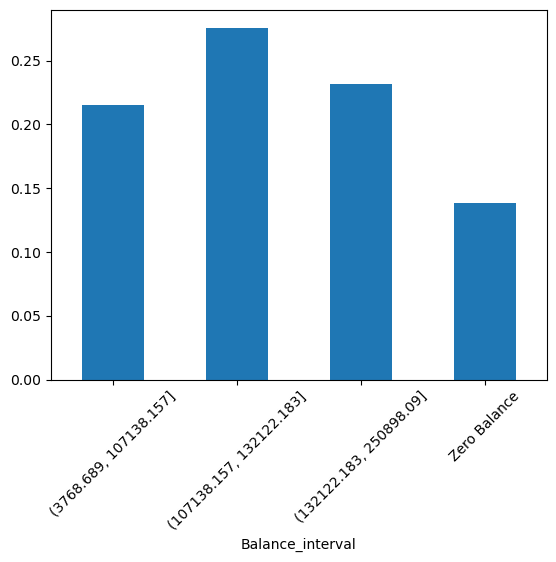

In [108]:
df.groupby('Balance_interval', observed=True)['Exited'].agg(['mean']).plot(kind = 'bar', rot=45, legend=False)

Баланс на счетах клиента влияет на отток клиентов банка. Так, клиенты с нулевым балансом реже покидают банк (13.8%), чем с высоким, средним и низким балансом.

## EstimatedSalary

In [111]:
df['Estimated_Salary_interval'] = pd.qcut(df['Estimated_Salary'], 5)

In [112]:
df.groupby('Estimated_Salary_interval', observed=True)['Exited'].agg(['count', 'mean'])

,count,mean
Estimated_Salary_interval,,
"(11.579, 41050.736]",2000,0.1995
"(41050.736, 80238.34]",2000,0.1995
"(80238.34, 119710.038]",2000,0.2020
"(119710.038, 159836.726]",2000,0.2020
"(159836.726, 199992.48]",2000,0.2160


<Axes: xlabel='Estimated_Salary_interval'>

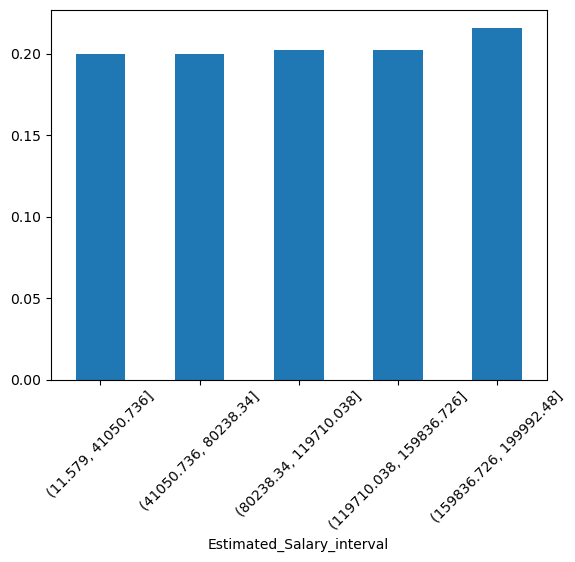

In [113]:
df.groupby('Estimated_Salary_interval', observed=True)['Exited'].agg(['mean']).plot(kind = 'bar', rot=45, legend=False)

Заработная плата клиентов не влияет на отток клиентов банка.

## Point Earned

In [116]:
df

,Customer_Id,Surname,Credit_Score,Geography,Gender,Age,Tenure,Balance,Num_Of_Products,Has_CrCard,...,Estimated_Salary,Exited,Complain,Satisfaction_Score,Card_Type,Point_Earned,Credit_Score_interval,Age_interval,Balance_interval,Estimated_Salary_interval
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,...,101348.88,1,1,2.0,DIAMOND,464,"(566.0, 627.0]","(40.0, 46.0]",Zero Balance,"(80238.34, 119710.038]"
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,...,112542.58,0,1,3.0,DIAMOND,456,"(566.0, 627.0]","(40.0, 46.0]","(3768.689, 107138.157]","(80238.34, 119710.038]"
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,...,113931.57,1,1,3.0,DIAMOND,377,"(349.999, 566.0]","(40.0, 46.0]","(132122.183, 250898.09]","(80238.34, 119710.038]"
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,...,93826.63,0,0,NaN,GOLD,350,"(678.0, 735.0]","(35.0, 40.0]",Zero Balance,"(80238.34, 119710.038]"
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,...,79084.10,0,0,NaN,GOLD,425,"(735.0, 850.0]","(40.0, 46.0]","(107138.157, 132122.183]","(41050.736, 80238.34]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,...,96270.64,0,0,NaN,DIAMOND,300,"(735.0, 850.0]","(35.0, 40.0]",Zero Balance,"(80238.34, 119710.038]"
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,...,101699.77,0,0,NaN,PLATINUM,771,"(349.999, 566.0]","(31.0, 35.0]","(3768.689, 107138.157]","(80238.34, 119710.038]"
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,...,42085.58,1,1,3.0,SILVER,564,"(678.0, 735.0]","(35.0, 40.0]",Zero Balance,"(41050.736, 80238.34]"
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,...,92888.52,1,1,2.0,GOLD,339,"(735.0, 850.0]","(40.0, 46.0]","(3768.689, 107138.157]","(80238.34, 119710.038]"


In [117]:
df['Point_Earned_interval'] = pd.qcut(df['Point_Earned'], 5)

In [118]:
df.groupby('Point_Earned_interval', observed=True)['Exited'].agg(['count', 'mean'])

,count,mean
Point_Earned_interval,,
"(118.999, 370.0]",2006,0.212363
"(370.0, 529.0]",2006,0.190429
"(529.0, 682.0]",1997,0.207311
"(682.0, 840.0]",1992,0.220382
"(840.0, 1000.0]",1999,0.188594


<Axes: xlabel='Point_Earned_interval'>

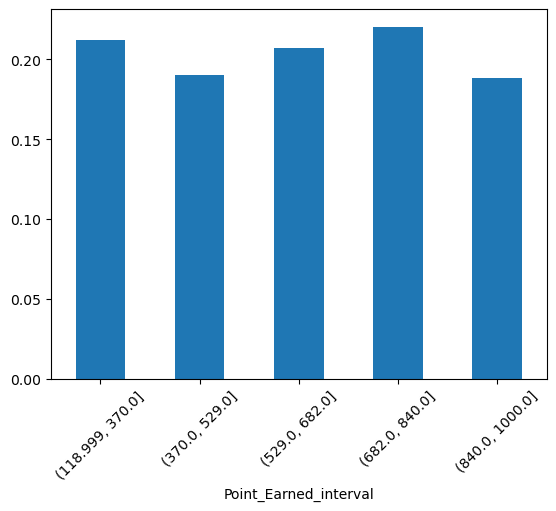

In [119]:
df.groupby('Point_Earned_interval', observed=True)['Exited'].agg(['mean']).plot(kind = 'bar', rot=45, legend=False)

Количество баллов, начисленных клиенту за использование кредитной карты, не влиет на отток клиентов банка.

## Общая визуализация

Text(0, 0.5, 'Mean')

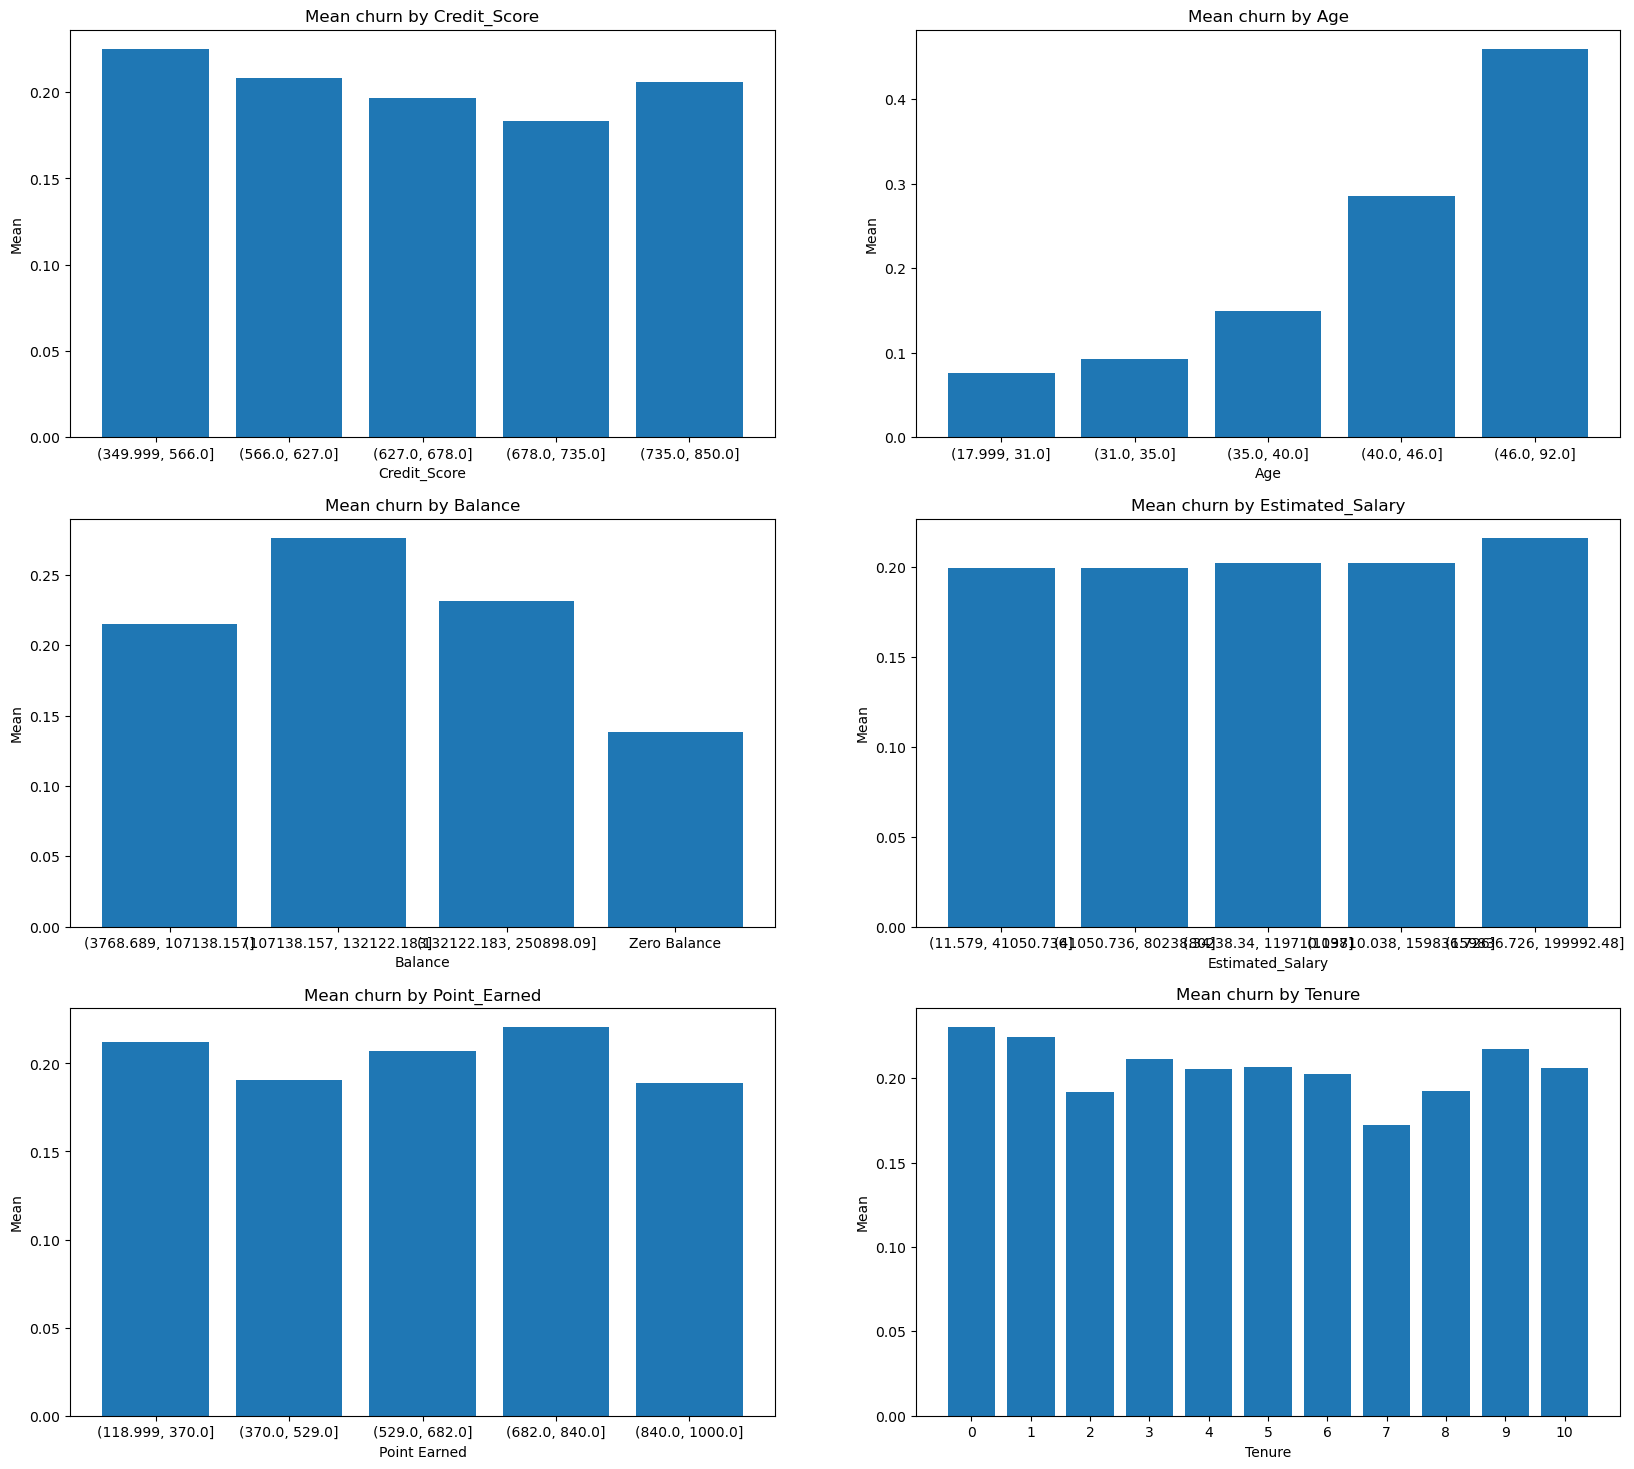

In [122]:
plt.figure(figsize = (20, 18))

plt.subplot(3, 2, 1)
CreditScore_mean = df.groupby('Credit_Score_interval', observed=True)['Exited'].agg(['mean'])
plt.bar(CreditScore_mean.index.astype(str), CreditScore_mean['mean'])
plt.title('Mean churn by Credit_Score')
plt.xlabel('Credit_Score')
plt.ylabel('Mean')

plt.subplot(3, 2, 2)
Age_mean = df.groupby('Age_interval', observed=True)['Exited'].agg(['mean'])
plt.bar(Age_mean.index.astype(str), Age_mean['mean'])
plt.title('Mean churn by Age')
plt.xlabel('Age')
plt.ylabel('Mean')

plt.subplot(3, 2, 3)
Balance_mean = df.groupby('Balance_interval', observed=True)['Exited'].agg(['mean'])
plt.bar(Balance_mean.index.astype(str), Balance_mean['mean'])
plt.title('Mean churn by Balance')
plt.xlabel('Balance')
plt.ylabel('Mean')

plt.subplot(3, 2, 4)
EstimatedSalary_mean = df.groupby('Estimated_Salary_interval', observed=True)['Exited'].agg(['mean'])
plt.bar(EstimatedSalary_mean.index.astype(str), EstimatedSalary_mean['mean'])
plt.title('Mean churn by Estimated_Salary')
plt.xlabel('Estimated_Salary')
plt.ylabel('Mean')

plt.subplot(3, 2, 5)
Point_Earned_mean = df.groupby('Point_Earned_interval', observed=True)['Exited'].agg(['mean'])
plt.bar(Point_Earned_mean.index.astype(str), Point_Earned_mean['mean'])
plt.title('Mean churn by Point_Earned')
plt.xlabel('Point Earned')
plt.ylabel('Mean')

plt.subplot(3, 2, 6)
Tenure_mean = df.groupby('Tenure', observed=True)['Exited'].agg(['mean'])
plt.bar(Tenure_mean.index.astype(str), Tenure_mean['mean'])
plt.title('Mean churn by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Mean')

# Выводы

Таким образом, можно сделать вывод, что на отток клиентов банка влияют следующие факторы:

- Geography (местоположение клиента). Показатель оттока различается в разных странах. В Германии он составил 32.4%, во Франции - 16.2%, в Испании - 16.7%. Это значит, что страна проживания клиента может влиять на его уход из банка. Компании, в первую очередь, следует обратить внимание на клиентов из Германии.
- Gender (пол клиента). Показатель оттока выше среди клиентов-женщин (25.1%) по сравнению с клиентами-мужчинами (16.5%). Это значит, что пол может играть роль в уходе клиента из банка. Клиенты женского пола более склонны к уходу.
- Complain (есть ли у клиента жалоба). 99.5% клиентов, у которых была жалоба, ушли из банка. Т.е. если у клиента есть жалоба, то он скорее всего перестанет быть клиентом банка. При отсутствии жалоб вероятность ухода клиента очень низкая (0.05%). Компании следует обратить на это внимание.
- IsActiveMember (Активные клиенты). Статус активности клиента влияет на отток клиентов из банка. Неактивные клинты чаще покидают банк (26.8%) по сравнению с активными клиентами (14.3%).
- NumOfProducts (количество продуктов, купленных клиентом через банк). Влияет на отток клиентов из банка. Мы не можем сказать, что 3 и 4 купленных продукта сильно влияют на уход клиента, т.к. по ним очень мало данных (266 и 60 клиентов соответственно). Но можем сделать вывод, что вероятность ухода у клиентов с 1 продуктом (27.7%) выше, чем у клиентов с двумя продуктами (7.6%).
- Age (возраст клиента). Возрастная группа клиента сильно влияет на показатель оттока. Из анализа видно, что с возрастом клиентов показатель оттока увеличивается. Это означает, что клиенты старшего возраста более склонны к уходу, в то время как молодые клиенты с большей вероятностью останутся в банке.
- Balance (Баланс на счетах клиента). Баланс на счетах клиента влияет на отток клиентов из банка. Так, клиенты с нулевым балансом реже покидают банк (13.8%), чем с высоким, средним и низким балансом.